In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Inventario de movimientos

(5713, 5293)


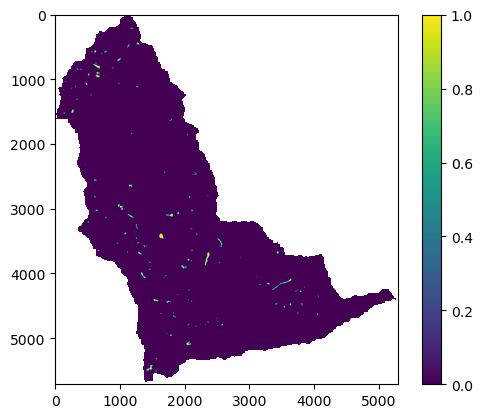

In [98]:
raster = rio.open("C:\Carto\Movimientos.tif")
inventario=raster.read(1)
inventario=np.where(inventario>=100,np.nan,inventario)
print(inventario.shape)
plt.imshow(inventario)
plt.colorbar();

In [3]:
np.unique(inventario)

array([ 0.,  1., nan])

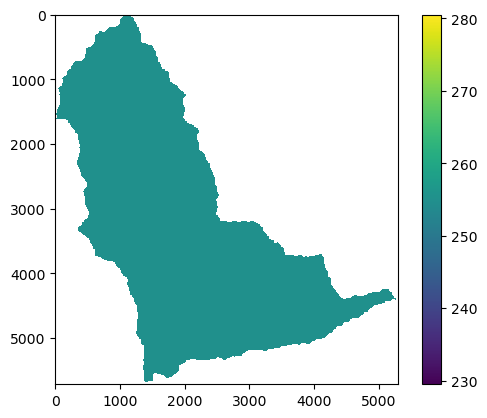

In [4]:
raster = rio.open("https://github.com/Erluan07/Cartografia-Geotecnica/blob/main/Taller_1/2_PYTHON/Limite.tif?raw=true")
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
plt.imshow(msk)
plt.colorbar();

(12048589,)

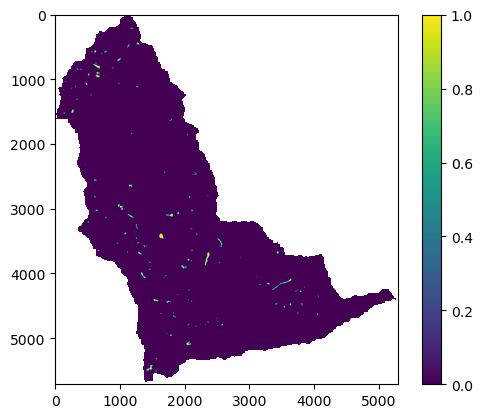

In [99]:
inventario=msk*inventario
inventario=np.where(inventario>=100,1,inventario)
plt.imshow(inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar();inventario_vector_MenM.shape
inventario_vector_MenM.shape

# Variables

(5713, 5293)


(12048589,)

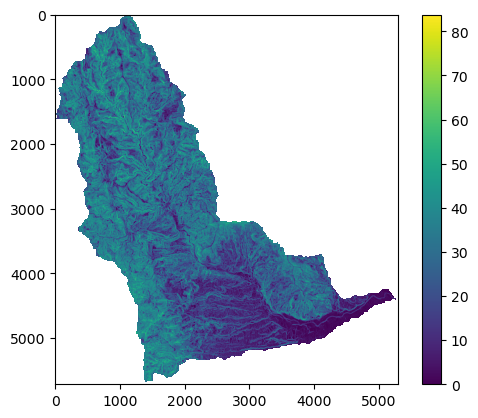

In [6]:
rasterpendiente = rio.open("C:\Carto\Pendientes.tif")
pendiente=rasterpendiente.read(1)
pendiente=np.where(pendiente<=-1,np.nan,pendiente)
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
plt.imshow(pendiente)
plt.colorbar();
print(pendiente.shape)
pendiente_vector_MenM.shape # otra forma de saber las dimensiones


(5713, 5293)


(12048589,)

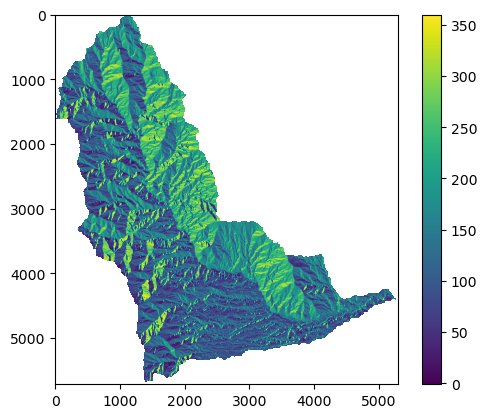

In [7]:
rasteraspecto=rio.open("C:\Carto\Aspectos.tif")
aspecto=rasteraspecto.read(1)
aspecto=np.where(aspecto<-10000,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar();
print(aspecto.shape)
aspecto_vector_MenM.shape

(5713, 5293)


(12048589,)

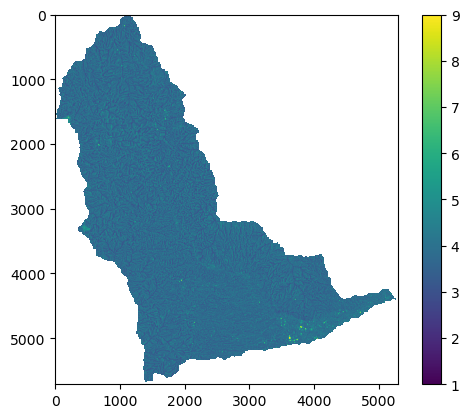

In [8]:
rastercurvatura=rio.open("C:\Carto\Curvatura_Total.tif")
curvatura=rastercurvatura.read(1)
curvatura=np.where(curvatura>=100,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar();
print(curvatura.shape)
curvatura_vector_MenM.shape

(5713, 5293)


(12048589,)

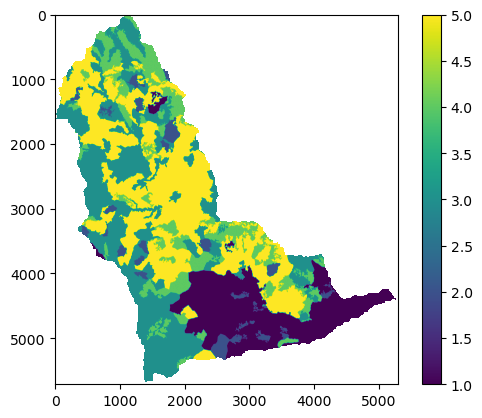

In [9]:
rastercoberturas=rio.open("C:\Carto\Coberturas.tif")
coberturas=rastercoberturas.read(1)
coberturas=np.where(coberturas>=100,np.nan,coberturas)
coberturas_vector=coberturas.ravel()
coberturas_vector_MenM=coberturas_vector[~np.isnan(coberturas_vector)]
plt.imshow(coberturas)
plt.colorbar();
print(coberturas.shape)
coberturas_vector_MenM.shape

(5713, 5293)


(12048589,)

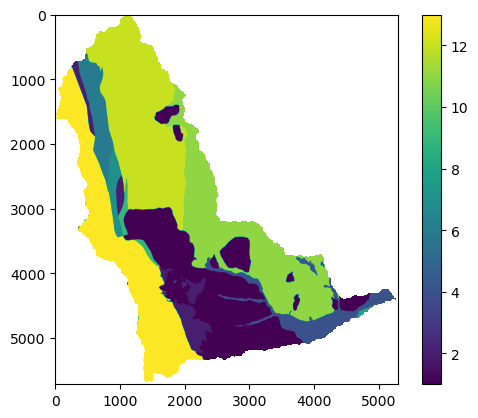

In [67]:
rastergeologia=rio.open("C:\Carto\Geologia.tif")
geologia=rastergeologia.read(1)
geologia=np.where(geologia>=100,np.nan,geologia)
geologia=np.where(geologia==0,6,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar();
print(geologia.shape)
geologia_vector_MenM.shape

(5713, 5293)


(12048589,)

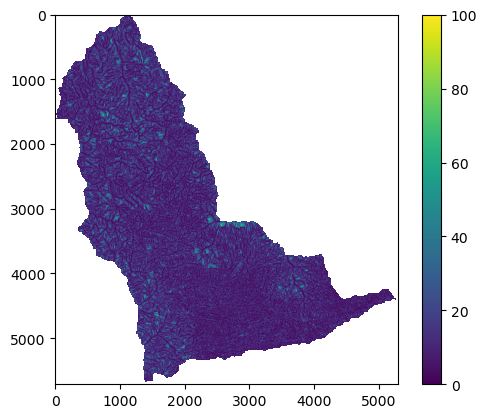

In [100]:
rasterfacc=rio.open("C:\Carto\Facc.tif")
facc=rasterfacc.read(1)
facc=np.where(facc<0,np.nan,facc)
facc=np.where(facc>100,0,facc)
facc_vector=facc.ravel()
facc_vector_MenM=facc_vector[~np.isnan(facc_vector)]
plt.imshow(facc)
plt.colorbar();
print(facc.shape)
facc_vector_MenM.shape

# Dataframe

In [101]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'coberturas':coberturas_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, "curvatura total":curvatura_vector_MenM,"flujo":facc_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'coberturas', 'aspecto', 'geologia', 'curvatura total', 'flujo']


In [102]:
df.head()

,inventario,pendiente,coberturas,aspecto,geologia,curvatura total,flujo
0,0.0,1.206597,1.0,186.982422,12.0,2.0,1.0
1,0.0,1.274284,1.0,169.732376,12.0,2.0,0.0
2,0.0,2.255759,1.0,141.842773,12.0,2.0,1.0
3,0.0,3.637963,1.0,133.590073,12.0,2.0,1.0
4,0.0,4.627886,1.0,135.497665,12.0,2.0,1.0


In [73]:
df["curvatura total"].value_counts()

curvatura total
2.0    4078402
6.0    3738968
3.0    1986795
4.0    1816867
1.0     113171
5.0     101149
8.0      83607
7.0      67610
9.0      62020
Name: count, dtype: int64

# Muestreo

In [15]:
(63819*100)/11984770

0.5325008323063355

In [14]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262339 entries, 7 to 12048574
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   inventario       1262339 non-null  float64
 1   pendiente        1262339 non-null  float32
 2   coberturas       1262339 non-null  float64
 3   aspecto          1262339 non-null  float32
 4   geologia         1262339 non-null  float64
 5   curvatura total  1262339 non-null  float64
 6   flujo            1262339 non-null  float32
dtypes: float32(3), float64(4)
memory usage: 62.6 MB


In [17]:
resumen=df1.describe().T
print(resumen)

                     count        mean        std  min        25%         50%  \
inventario       1262280.0    0.050559   0.219094  0.0   0.000000    0.000000   
pendiente        1262280.0   26.672523  13.650987  0.0  16.212319   27.480183   
coberturas       1262280.0    3.393368   1.449305  1.0   3.000000    3.000000   
aspecto          1262280.0  154.145065  93.711769 -1.0  78.668650  142.739418   
geologia         1262280.0    8.400844   4.868062  0.0   2.000000   11.000000   
curvatura total  1262280.0    3.833161   1.762479  1.0   2.000000    3.000000   

                        75%         max  
inventario         0.000000    1.000000  
pendiente         36.867698   83.687714  
coberturas         5.000000    5.000000  
aspecto          222.623253  359.998810  
geologia          12.000000   13.000000  
curvatura total    6.000000    9.000000  


In [16]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,pendiente,coberturas,aspecto,geologia,curvatura total,flujo
0,1.206597,1.0,186.982422,12.0,2.0,1.0
1,1.274284,1.0,169.732376,12.0,2.0,0.0
2,2.255759,1.0,141.842773,12.0,2.0,1.0
3,3.637963,1.0,133.590073,12.0,2.0,1.0
4,4.627886,1.0,135.497665,12.0,2.0,1.0


In [17]:
matriz_cont=matriz.drop(['geologia',"coberturas","curvatura total"],axis=1)
matriz_cont.head()

,pendiente,aspecto,flujo
0,1.206597,186.982422,1.0
1,1.274284,169.732376,0.0
2,2.255759,141.842773,1.0
3,3.637963,133.590073,1.0
4,4.627886,135.497665,1.0


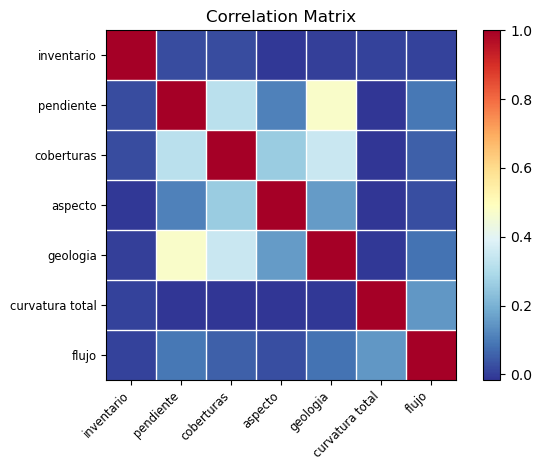

In [97]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

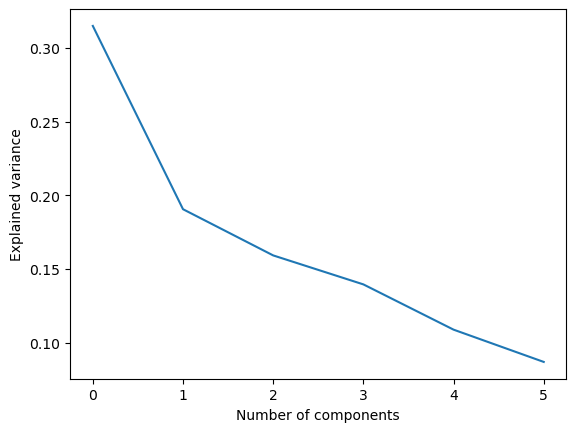

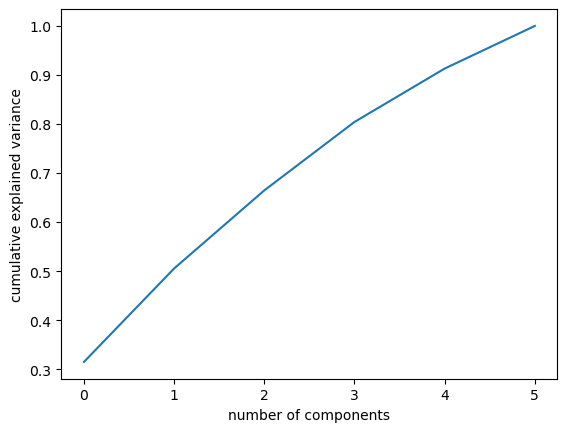

C:\Users\Erluan\anaconda3\envs\Cartografia\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


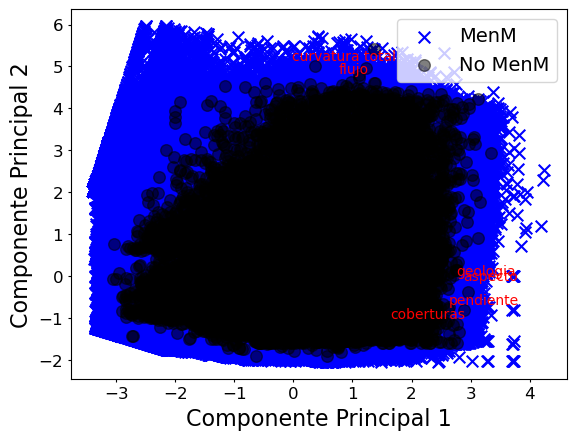

In [103]:
#Se importan los archivos
data = df
puntos = data['inventario']
data.drop('inventario', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
data = pd.DataFrame(scale(data), columns=['geologia', 'pendiente', 'coberturas', 'aspecto', 'curvatura total', 'flujo'])

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] # Componente principal 1
ys = pca.transform(data)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.show()

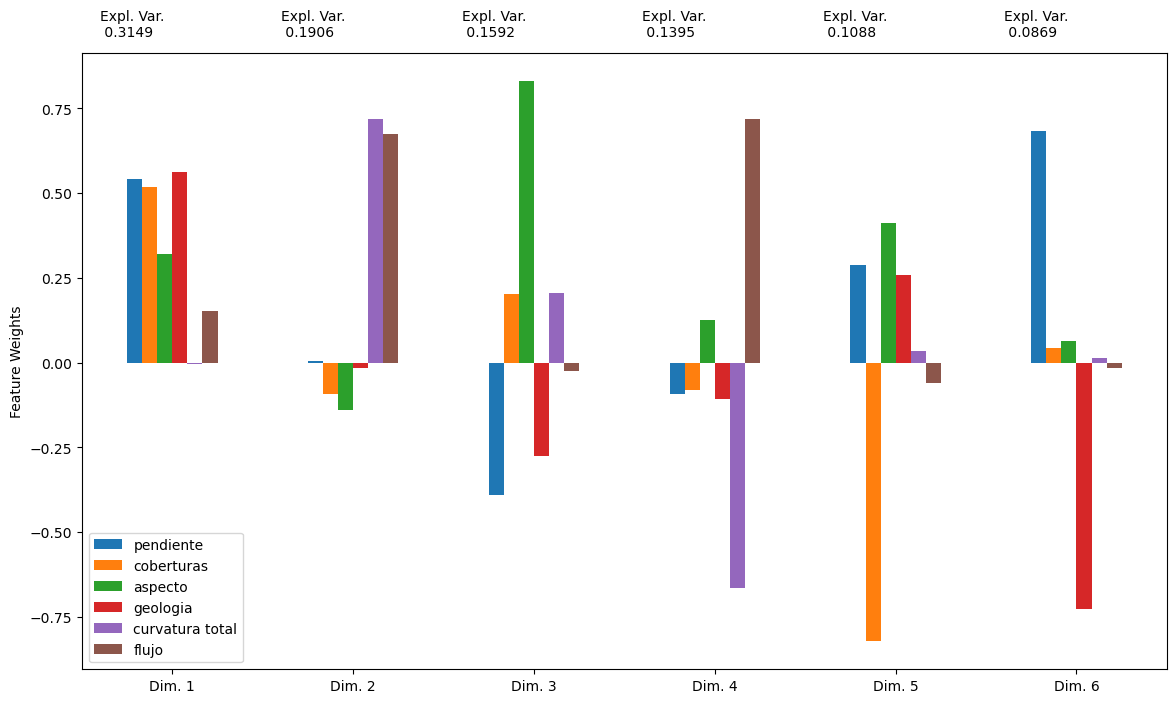

In [104]:
def pca_results(df, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(df, pca)

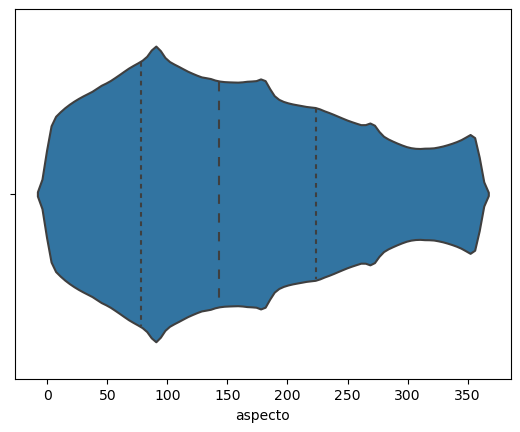

In [74]:
sns.violinplot(x=df['aspecto'], inner='quartile', label="Aspecto");

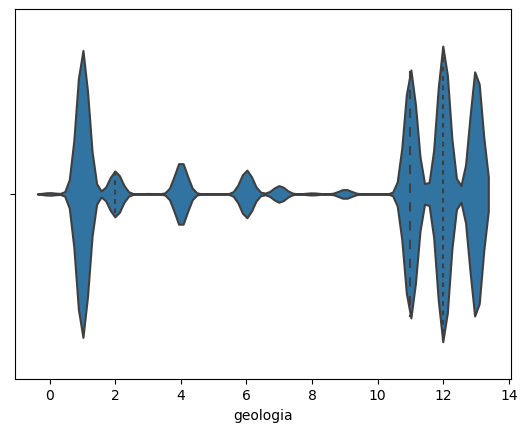

In [47]:
sns.violinplot(x=df['geologia'], inner='quartile');

<Axes: xlabel='pendiente'>

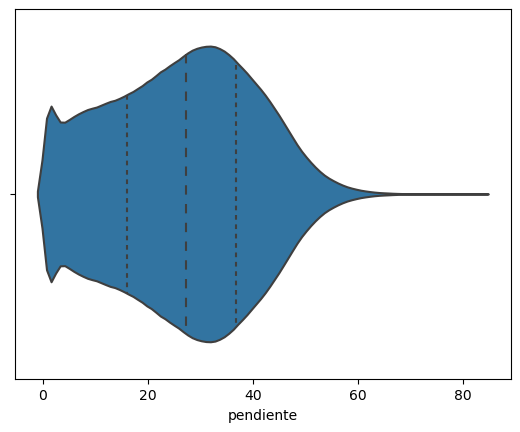

In [48]:
sns.violinplot(x=df['pendiente'], inner='quartile')

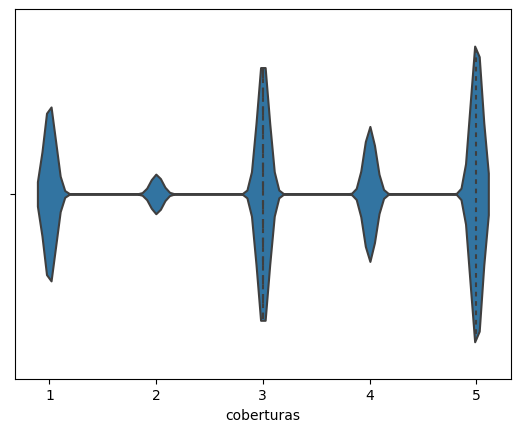

In [49]:
sns.violinplot(x=df['coberturas'], inner='quartile');

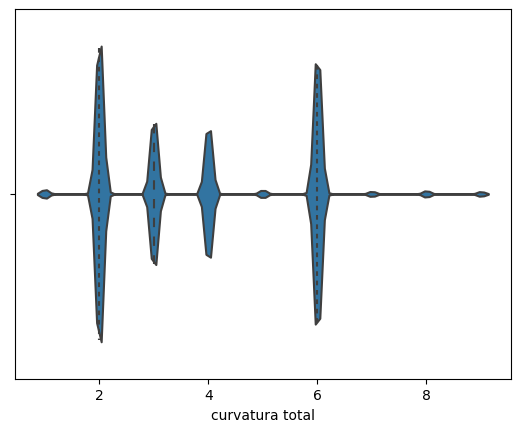

In [50]:
sns.violinplot(x=df['curvatura total'], inner='quartile');

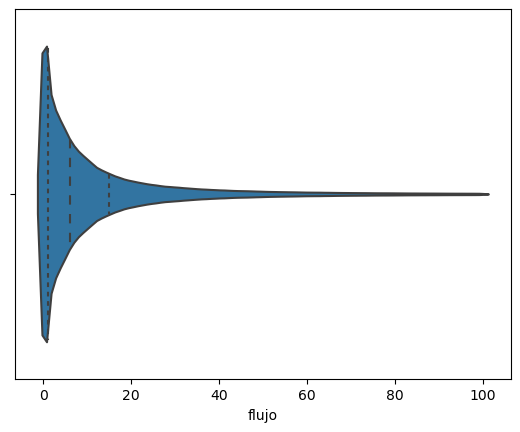

In [51]:
sns.violinplot(x=df['flujo'], inner='quartile');

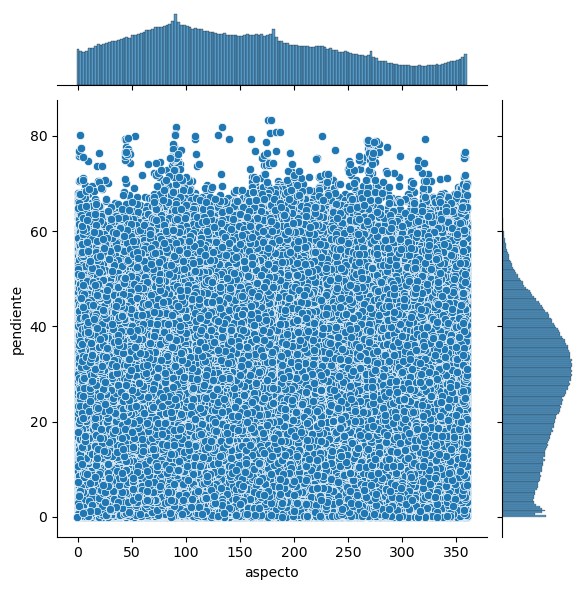

In [78]:
sns.jointplot(x='aspecto', y='pendiente', data=df1, kind='scatter');

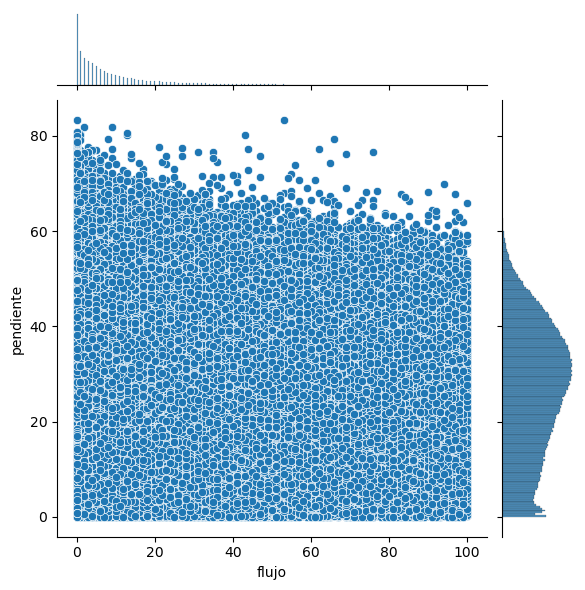

In [27]:
sns.jointplot(x='flujo', y='pendiente', data=df1, kind='scatter');

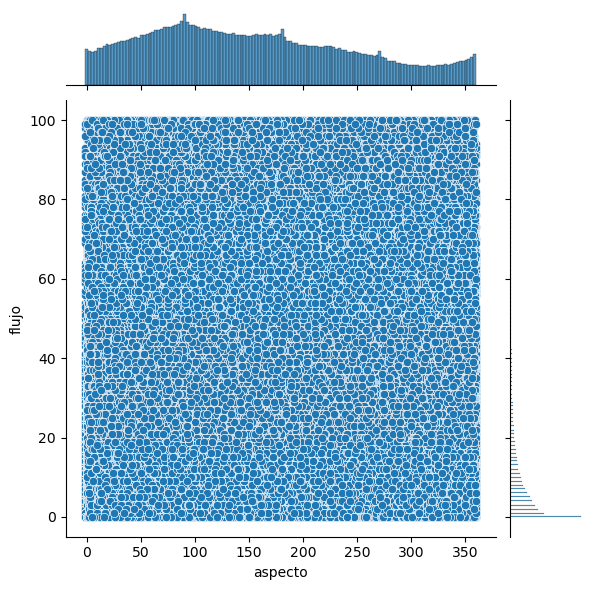

In [43]:
sns.jointplot(x='aspecto', y='flujo', data=df1, kind='scatter');

In [32]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]
si_lands.count()

inventario         63819
pendiente          63819
coberturas         63819
aspecto            63819
geologia           63819
curvatura total    63819
flujo              63819
dtype: int64

In [33]:
no_lands.count()

inventario         11984770
pendiente          11984770
coberturas         11984770
aspecto            11984770
geologia           11984770
curvatura total    11984770
flujo              11984770
dtype: int64

In [79]:
media=df.groupby('inventario').mean()
print(media)

            pendiente  coberturas     aspecto  geologia  curvatura total  \
inventario                                                                 
0.0         26.455828    3.370625  154.624954  8.409911         3.828579   
1.0         30.587906    3.843511  142.234924  8.439242         3.965057   

                flujo  
inventario             
0.0         12.065327  
1.0         13.775553  


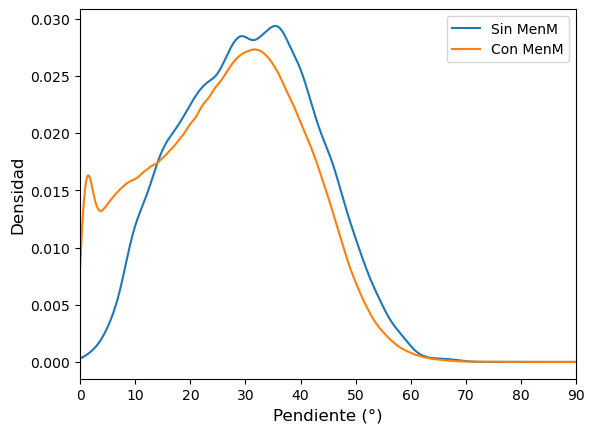

In [47]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

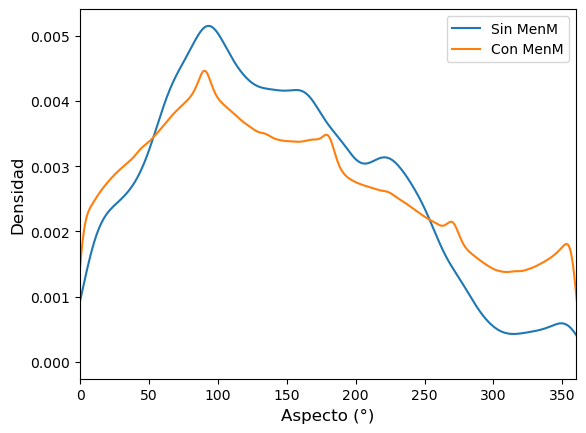

In [40]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,360)
ax.set_xlabel('Aspecto (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

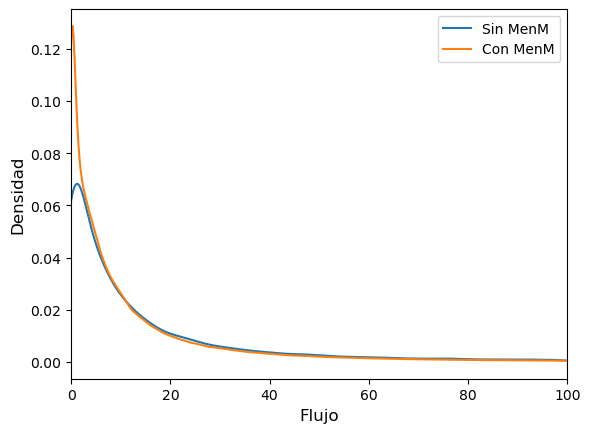

In [41]:
fig, ax = plt.subplots()
si_lands['flujo'].plot.kde(ax=ax, label='Sin MenM')
no_lands['flujo'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,100)
ax.set_xlabel('Flujo', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

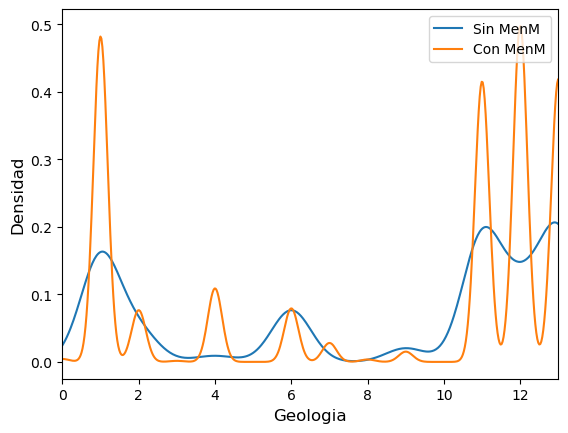

In [42]:
fig, ax = plt.subplots()
si_lands['geologia'].plot.kde(ax=ax, label='Sin MenM')
no_lands['geologia'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,13)
ax.set_xlabel('Geologia', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

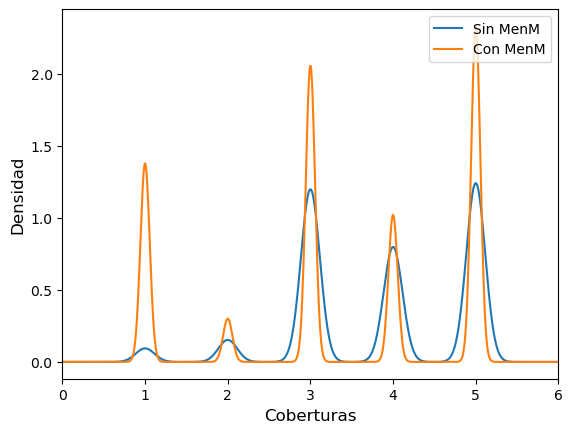

In [94]:
fig, ax = plt.subplots()
si_lands['coberturas'].plot.kde(ax=ax, label='Sin MenM')
no_lands['coberturas'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,6)
ax.set_xlabel('Coberturas', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

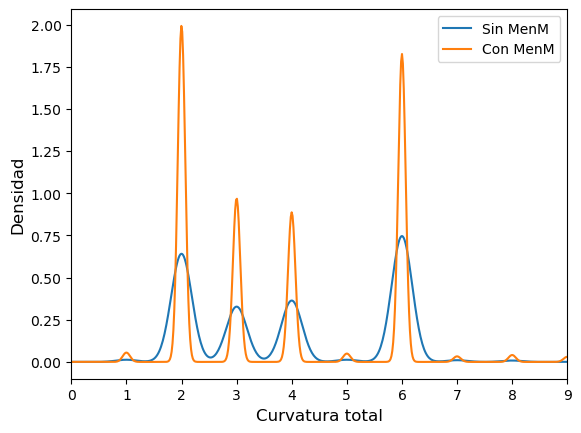

In [95]:
fig, ax = plt.subplots()
si_lands['curvatura total'].plot.kde(ax=ax, label='Sin MenM')
no_lands['curvatura total'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,9)
ax.set_xlabel('Curvatura total', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)